In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r'Q:\Data_Analytics_Secure\Analytics Work Area\Interns\Wrobleski\Board_Member_Info.csv')

In [3]:
df = df.dropna()

In [4]:
column_edge = 'VENDOR_NAME'
column_ID = 'PERSONNM'

data_to_merge = df[[column_ID, column_edge]]

In [5]:
data_to_merge = data_to_merge.merge(data_to_merge[[column_ID, column_edge]].rename(columns = {column_ID:column_ID + '_2'}), on = column_edge)

In [6]:
d = data_to_merge[~(data_to_merge[column_ID]==data_to_merge[column_ID+"_2"])].dropna()[[column_ID, column_ID+"_2", column_edge]]

In [7]:
d.drop(d.loc[d[column_ID+"_2"]<d[column_ID]].index.tolist(), inplace=True)

In [ ]:
d[:10]

In [8]:
G = nx.from_pandas_edgelist(df=d, source=column_ID, target=column_ID+'_2', edge_attr=column_edge)

In [ ]:
#G.add_nodes_from(nodes_for_adding=df.ID.tolist())

In [ ]:
G.nodes()

In [9]:
%matplotlib inline

In [10]:
x = nx.subgraph(G,[228576, 277453, 313182, 323015])
edge_labels = nx.get_edge_attributes(x, 'VENDOR_NAME')

In [61]:
bad_players = ['STEVE BERNSTEIN', 'NYUN NYUN MYINT', 'JULIA SMITH','EARL WASHINGTON', \
               'REV NIGEL PEARCE','ERIC J FRIEDMAN','ANDREW ROSEN', \
               'HILL A FEINBERG','EFREM GRAHAM','ANDREW CARBONARA','BELGICA CARBONARA', \
               'MONICA BRAGGS','ROBERT HETTENBACH','ALAN WEINSTOCK', 'MONTY BODENHEIMER MD', \
               'GUY MOSZKOWSKI FROM 915', 'MICHAEL JABBOUR', 'ROSEMARY STEIN','JEFFERY MOTT', \
               'HEIDI GOLDSTEIN','ALAN F KING','JOHN CARDWELL PHD','ARI BENJAMIN',\
               'WAFA ABBOUD','MARC ARONSEIN','AUDREY WESSON','MICHAEL WHELAN THRU 416', \
               'MIRIELLE DUPERVAL','REV DR CHARLES CURTIS','WARREN BETTY MD', \
               'ELIZABETH FINKEL MSW','PAUL PRONOVST MD', 'TODD GREENBERG', \
               'BENJAMIN NORDSTROM','HEMA VAKAHARIA','DEREK BROOMES', 'BURTON M TANSKY', \
               'JILL NEVINS','SPENCER VIBBERT','KERAH N WILLIAMS','LOU MERCADO', \
               'CLARE BRADELEY POLLET MD','SAMID NAMIN','HOWARD MEITINER','BLAINE ATKINS', \
               'EDWARD D MILLER','MS VIRGINIA M MONTAGUE','ROBAIR REICHENSTEIN', \
               'ED HUBBARD','SHERRY TUCKER','CAROL GARDENER','LENETTE KINION', \
               'DAVID MARCUS FROM 616','SALLY BERNSTEIN','JAZ-MICHAEL KING', \
               'KRISTINA ROMANZI','DANIEL E KOBLENTZ MD','LARRY WILSON','JAMES E BOLIN', \
               'JOANN SACKS','ROBERT E WILSON','BYRON R WIEN','MARY PAT THORNTON', \
               'BARBARA A YASTINE','MITALI SOHONI','REV SHEPHERD LEE SR','MARK G WHITE', \
               'CAROL RODAT','ROSE ANELLO','KATHLEEN LEBEAU','BARRY GOLDSTEIN', \
               'SHIRLEY LORD ROSENTHAL','MARK HURWITZ THRU 1115','MARY CHANDY','ERDAL SARAC', \
               'MICHAEL FORD','HOWELL SCHRAGE MD','JOAN O DAWSON','SR PAULETTE LOMONACO', \
               'BYRON S CALAMESE','JOHN SARDELIS DR PH','RICHARD S BERMAN MA', \
               'TYLER N GROSSO','SHARON DORR','RONALD A PAYNTER MD','LOIS WAGH', \
               'STEPHEN TYREE', 'PAUL ROWLAND','REV KEITH W ROBERSON','ANNETTE TAPERT', \
               'DAVID M ROSENTHAL PHD','EDGAR EDNALINO','SANDRA S PERSHING','MARY JOYNER', \
               'JACQUELINE HERRARA','KEVIN KIRCHOFF','WILLIAM D RIFKIN','LEE VANCE', \
               'KENNETH B MARLIN','PAUL MACIELAK ESQ','MR LANDON DAIS','RICHARD ALFIERI', \
               'JOHN HAIGNEY MDIV','MARYA PIOTROWSKI','TIMOTHY FULTON','AMELIA WRIGHT BREWER', \
               'STACIE RICHARDSON','KATHY KELLY FROM 216','ERNEST H POMERANTZ', \
               'MITCHELL S ROSENTHAL','GAIL BAROUH PHD','REV DR CARL L WASHINGTONJR', \
               'DOUGLAS O\'DELL','ROSE MARIE BRAVO CBE','CHAIM CHARYTAN MD', \
               'EDWIN VELAZQUEZ LMSW','GEORGE H WELDON JR','YELITZA SEOANE','LYNN CARTER', \
               'STEVEN L MARGOLIES','THOMAS JASPER','JOHN R LEWIN BA MBA CFP CTFA', \
               'DONNA COLONNA','TIMOTHY J NOONAN','REV WENDY J KELLY-CARTER', \
               'SHERI L SWEITZER','ROBERT G LERNER MD','ADRIENNE THOMAS','STEPHANIE SHUMAN', \
               'ROBIN NORMAN DEPAOLI','PAMELA WEINBERG THRU 915','JOHN FRIEDMAN MD', \
               'JASON S OGISTE','BRIAN EDWARDS','ROBERT M HOWE','BRENDAN L HOFFMAN', \
               'VIRGINIA HILL','SHAVONE HAMILTON','FRANCIS BARRON','RICHARD L PLEPLER', \
               'WILLIAM A DOLAN MD','JEANNE ALICANDRO MD','LOUIS MORANDI BS','FADIA ZAHRIEH', \
               'WOLE C COAXUM','SILVA UMUKORO','DAVID LURIE','MARC METRICK','WANDA GARCIA', \
               'JOHN GALLAGER','KAREN SODOMICH','SUSAN E CAPONI','ALAN SILVER MD', \
               'CHARLES A HEIMBOLD JR', 'ULYSSES S KILGORE III','JESSICA TAYLOR O\'MARY', \
               'ANN BRAY','EDWARD STACK','DONALD A WINIKOFF MD','GERALD L KONG','SCOTT ALBIN', \
               'IMAM TALIB\'ABDUR RASHID','ESPERANCE NDAYISHIMIYE PA','EARL BROWN', \
               'SHARON JONES','BRUCE MCLEOD','HARRIET GOURDINE-ADAMS', \
               'PAUL LIEFFRIG THRU 516','ANDREW J KOLODNY','PATTI WEINBERG','ROBERT SHERMAN', \
               'THOMAS HARTMAN','JEFFREY DITZELL','RAYMOND SWEENEY','ERNIE ENAD', \
               'GEORGE A KELLNER','SHELDON BERMAN','HEATHER WEXELL','JOHN PIERCE', \
               'JOEL YOHAI MD','MARIA MACLORRAIN','THOMAS J FABBRICANTE BS','TANJELA K CARTER', \
               'REV EVA G DUZANT','NANCY HOVING','BRUCE CHERNOF','ESSIE DUGAN', \
               'MIRNA DAOUK FROM 915','TSAHIA HOBSON','ROY FORBES','FRANK PENNUCI', \
               'SCOTT DRENVIG','JAVIER GUERRERO','MICHAEL HAILYE','JOHN DIEHL', \
               'ALVARO SIMMONS','AMY SINGER','SHARON KLUGEWICZ MS','MALCOLM A PUNTER', \
               'STEPHEN MACK','DAWN EDWARDS','CARLOS ALVAREZ','SANDRA MURMAN', \
               'PERRY PERLMUTTER','BRIAN REGAN','W CHRISTOPHER WHITE','JANE VELEZ', \
               'EDISON MACHADO MD','JEFFREY FINKLE','H CRAIG TREIBER','FRANK DOROFF', \
               'HARRY M FEDER','JEAN G LEON','CHERYL G HEALTON DRPH','D RAY WARD', \
               'KELLY WILLIAMS','NOEL WEEKES JR','WILLIAM GREEN','CATHERINE HART LMSW', \
               'SAUNDRA ALEXANDER','ANNIE NICHOLSON','REVJOHN LSCOTTABMDIV','WIILIAM BEIGHE', \
               'LISA LASHLEY','IRENE POSIO','MICHAEL D BERKOWITZ','THEODORE O WILL', \
               'LAURENCE C LEEDS JR','MARC LION CPA CFP','AMY SINGER', 'ANN BRAY', 'BENJAMIN NORDSTROM', \
               'BRUCE CHERNOF','BYRON S CALAMESE', 'D RAY WARD', 'EFREM GRAHAM', \
               'ERDAL SARAC','HARRIET GOURDINE-ADAMS', 'HEIDI GOLDSTEIN', 'HEMA VAKAHARIA', \
               'HOWARD MEITINER', 'JOHN DIEHL', 'JULIA SMITH', 'KAREN SODOMICH', \
               'KEVIN KIRCHOFF', 'MONTY BODENHEIMER MD', 'ROBERT E WILSON', \
               'ROBIN NORMAN DEPAOLI', 'WIILIAM BEIGHE','SONDRA SNEAD','JOCELYN ALLENDE', \
              'PHIL GARRETT','LAWRENCE AMACHER','STEVEN LARSON','KEVIN BEUTEL','CARL MEYERS', \
               'TAMMY SNELGROVE','EDWIN BEUTEL','LAWRENCE AMACHER','STEVEN GILL', \
              'DARWIN HASELEY','DOUGLAS ETUE','ERIC PRESSLEY','JAMES CHURCH','DARRIN KELLER', \
              'CHRIS CLAY','ROBERT KROENING','RODNEY HOGG','M JAMES ETUE','AMY E SINGER','LILIANE DRAGO', \
              'KEITH J GURNICK','TINA BROWN','EDWIN SAYONG','KEITH GORDON','CAROL A HERTLING', \
              'CARY L HALL JR','MARISSA SHORENSTEIN','DENI CARISE','HERB GOETSCHIUS','JILL COLLINS', \
              'DAVID A DEITCH','HOWARD P MEITINER','TALMIRIAM SHMULOVICH','PETER H OTTMAR', \
              'STEPHEN C DONOWITZ']


In [62]:
'STEPHEN C DONOWITZ' in bad_players

True

In [63]:
s = G.subgraph(nx.shortest_path(G.to_undirected(),'CAROLYN SILVER'))

In [64]:
color_map = []
for node in s:
    if node in bad_players:
        color_map.append('red')
    elif node == 'CAROLYN SILVER':
        color_map.append('yellow')
    else: color_map.append('mediumseagreen')  

{'AARON MARKS': <matplotlib.text.Text at 0x230cb5d8a20>,
 'AARON R MARCU': <matplotlib.text.Text at 0x230cb60bf60>,
 'ABBOT STILLMAN': <matplotlib.text.Text at 0x230cb5386d8>,
 'ADEEL A MANGI': <matplotlib.text.Text at 0x230cb66ba20>,
 'ADIL NATHANI': <matplotlib.text.Text at 0x230cb126c18>,
 'ADRIENE L HOLDER': <matplotlib.text.Text at 0x230cb6c9f60>,
 'ALAN JOSEPH': <matplotlib.text.Text at 0x230cb528198>,
 'ALAN SIEGEL': <matplotlib.text.Text at 0x230cb658f60>,
 'ALEX V CHACHKES': <matplotlib.text.Text at 0x230cb52fc18>,
 'ALICIA OUELLETTE': <matplotlib.text.Text at 0x230cb1b6a20>,
 'ALISON BLOOD': <matplotlib.text.Text at 0x230cb5286d8>,
 'ALLAN J FOX': <matplotlib.text.Text at 0x230cb6d3f60>,
 'ALYSIA PASCARIS': <matplotlib.text.Text at 0x230cb51e198>,
 'AMABEL B JAMES': <matplotlib.text.Text at 0x230cb4ecc18>,
 'ANDREA L COLBY': <matplotlib.text.Text at 0x230cb69ef60>,
 'ANDREW BODNAR': <matplotlib.text.Text at 0x230cb569c18>,
 'ANTHONY C THOMPSON': <matplotlib.text.Text at 0x230

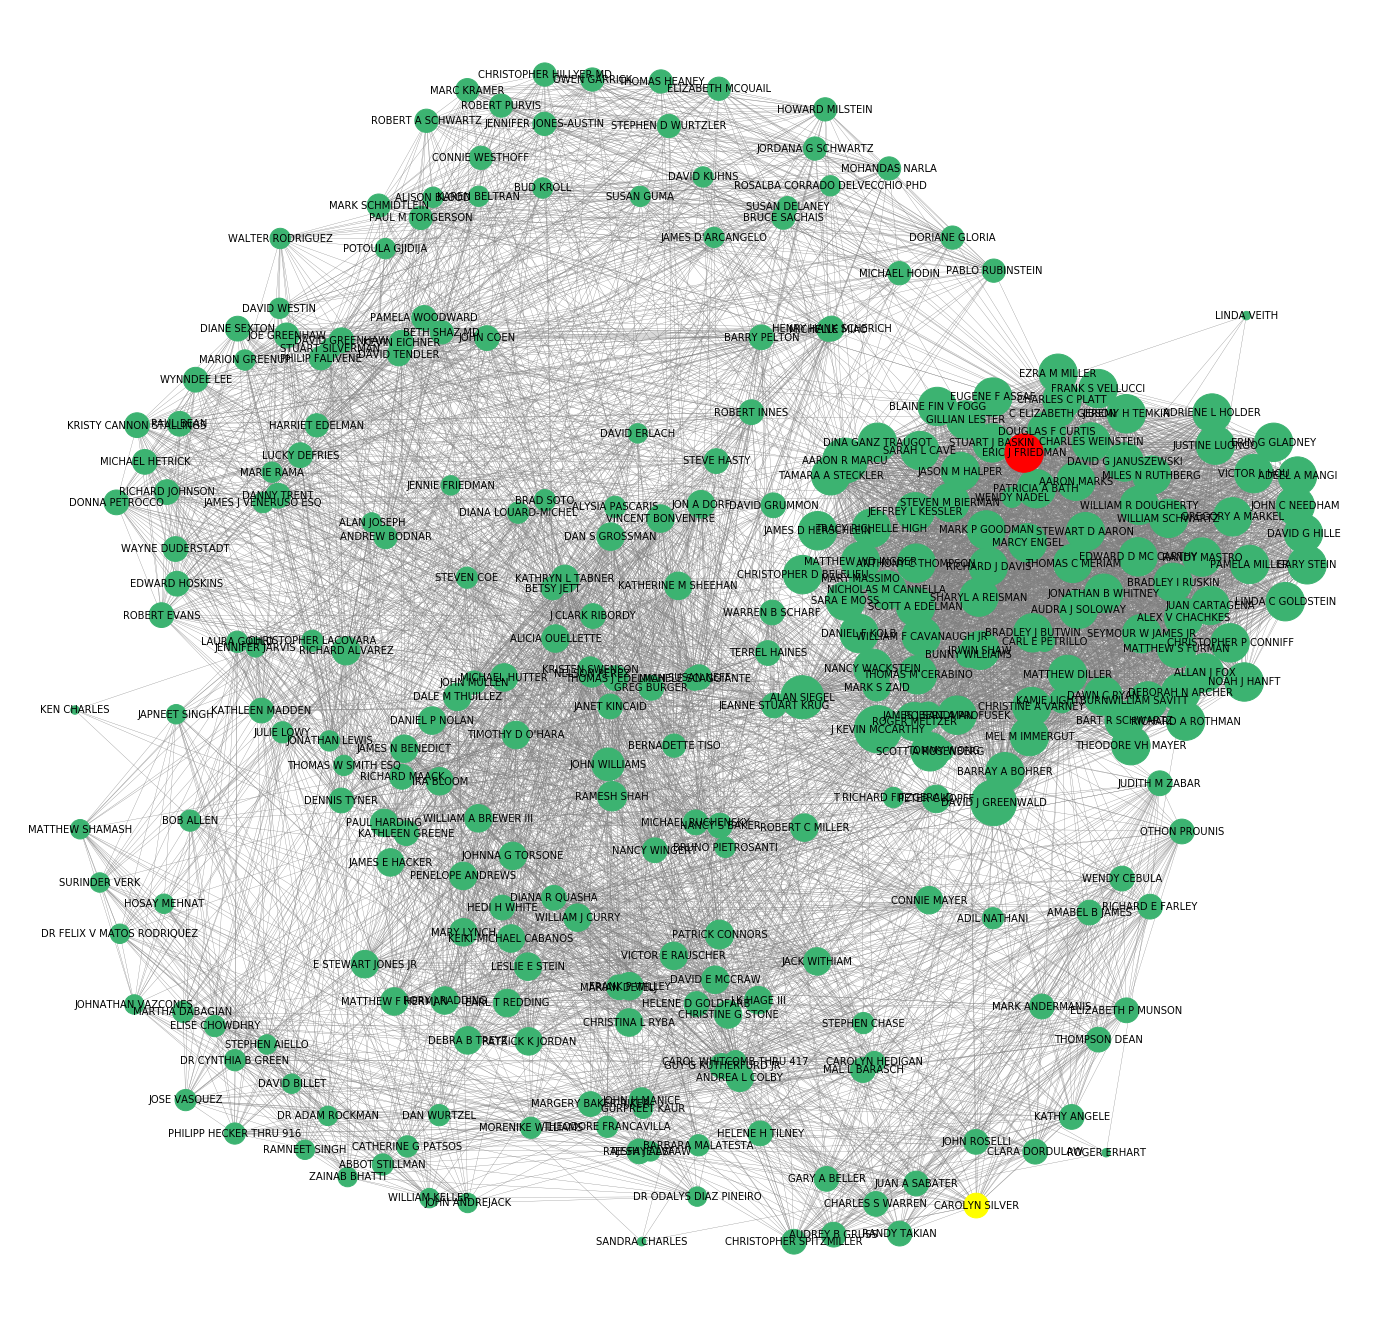

In [69]:
sd = dict(s.degree)
plt.figure(figsize=(19,18)) 
pos = nx.spring_layout(s, k=19*1/np.sqrt(len(s.nodes())))
nx.draw(s, pos = pos, node_shape="o",edge_color='grey',node_color=color_map,width = 0.3, nodelist=sd.keys(), node_size=[v * 18 for v in sd.values()])
nx.draw_networkx_labels(s, font_size = 10,pos=pos)